# Predicting_Students_Scores

* This beginner-friendly project aims to employ supervised machine learning to predict students' scores based on study hours, recognizing the crucial connection between study time and academic performance.
* The primary objective is to develop a simple linear regression model, involving only two variables:
    * study hours (input data  $x$) and actual scores (the target $y$ ). 
* This Simple project is focused on practice and learning. To achieve this goal, we are utilizing a small dataset containing information about study hours and scores for specific students. Our approach involves a step-by-step process, with a particular emphasis on elaborating on the important details.




<img src="https://static.vecteezy.com/system/resources/previews/014/050/038/original/kids-drawing-illustration-of-a-student-study-hard-to-become-the-top-student-for-next-exam-in-a-cartoon-style-vector.jpg" alt="Your Image" width="500"/>





### Tools and  Prerequisites: 
* NumPy, a popular library for scientific computing.
* Matplotlib, a popular library for plotting data.
* Pandas, a popular library for data manipulation and analysis in Python. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the dataset:
df = pd.read_csv('dataset.txt')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Lets check the size of our dataframe.
len(df)

25

In [4]:
# perpare input data as numpy array.
x= np.array(df['Hours'])
x

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])

In [5]:
# perpare the output data or target y.
y =np.array(df['Scores'])
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [6]:
# check the shape of the input and target data.
x.shape , y.shape

((25,), (25,))

## Ploting the data


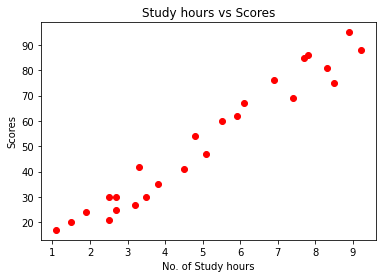

In [7]:
# Plot the data points
plt.scatter(x, y, c='r')
# Set the title
plt.title("Study hours vs Scores")
# Set the y-axis label
plt.ylabel('Scores')
# Set the x-axis label
plt.xlabel('No. of Study hours')
plt.show()

## Model function

* As we can see in the graph above, it is evident that the relationship between the input variable `x` and the corresponding target variable `y` follows a linear regression pattern.
* The model function for linear regression (which is a function that maps from `x` to `y`) is represented as: 

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
* The formula above is how you can represent straight lines - different values of  w  and  b  give you different straight lines on the plot.

* For simplisity we will rewrite the equation (1) above as the following: $ \hat{y} = wx^{(i)} + b \tag{2}$.
* The idea from this model is to find the appropriate values for 'w' and 'b', then when we have these values/ parameters 'w', 'b', and  number of study hours 'x' for new student, we can get/predict the corresponding output (the score 'y') for that student.
* Remark: We should distiguish between the actual targed y and predicted target y_hat : $ y, \hat{y} $


* Now: let's initiate the calculation using arbitrary values for 'w' and 'b'( let's say w= 5  and  b= 2) and determine the value of  $\hat{y}$ for our data points and compare it with actual target y.

In [8]:
# First we will assign the values to w,b parameters
w = 5 
b = 2

In [9]:
# lets also print some examples from the dataset to see  x (hours) and actual y (Scores) values.
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


*  We can see that when the student studied for 2.5 hours, his/her actual score y was 21, and when studies 5.1 , score was 47 and so on.


* Now lets use our model (Equation (2) above)  to predict some scores ($\hat{y}$) of the first 5 examples shown above.

In [10]:
# Now we will predict y_hat for the first example when x=2.5 and w=5 ,b=2.
y_hat = w * x[0] + b
y_hat

14.5

In [11]:
# and for the second example, when x= 5.1
y_hat = w * x[1] + b
y_hat

27.5

* we can see that our model predict 14.5 score( $\hat{y} = 14.5$) for the first example when student studied for 2.5 hours( $ x=2.5 $), but the real score was 21 ($ y = 21 $ ), and predicts 27.5 scores when studied for 5.1 hours while the actual score ($ y= 47 $). which means that our model still bad and we shoud change the values of  parameters 'w' and 'b' to make the model more accurate.
* Fore sure, keep changing 'w' and 'b' manually is not practical solution, but for the seek of learning and to have intuition,  we will continue that for now and later we will use an optimization  algorithm which select the best values for our model parameters 'w' and 'b'.

In [12]:
# Now Lets use our model to predict all socres at once
y_hat = np.zeros(len(x))
for i in range(len(x)):
    y_hat[i] = w * x[i] + b
y_hat

array([14.5, 27.5, 18. , 44.5, 19.5,  9.5, 48. , 29.5, 43.5, 15.5, 40.5,
       31.5, 24.5, 18.5,  7.5, 46.5, 14.5, 11.5, 32.5, 39. , 15.5, 26. ,
       21. , 36.5, 41. ])

In [13]:
# We can utilize numpy casting instead using for loop as the following:
y_hat = w * x + b
y_hat

array([14.5, 27.5, 18. , 44.5, 19.5,  9.5, 48. , 29.5, 43.5, 15.5, 40.5,
       31.5, 24.5, 18.5,  7.5, 46.5, 14.5, 11.5, 32.5, 39. , 15.5, 26. ,
       21. , 36.5, 41. ])

* Lets plot the real datapoints and the prediction data points and see how our model fits the data?


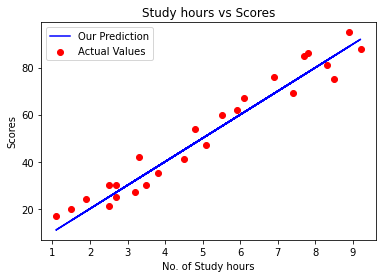

In [49]:
# Plot the real data points
plt.scatter(x, y, c='r',label='Actual Values')

# Plot our model prediction
plt.plot(x, y_hat, c='b',label='Our Prediction')

# Set the title
plt.title("Study hours vs Scores")
# Set the y-axis label
plt.ylabel('Scores')
# Set the x-axis label
plt.xlabel('No. of Study hours')
plt.legend()
plt.show()

* As we can see, setting  w= 5  and  b = 2  does not result in a line that fits our data (under fit).

* Now we will try experimenting with different values of  w  and  b ( manually) trying to make the line(predicted points $ \hat{y}$) fits actual data ($ y $).
* In order to try that many times easily, we shoul write two functions: 
    * first function:  for caculating the predictions.
    * Second function for ploting the data.

In [54]:
# A function for caculating the predictions.
def model_predictions(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
    m = len(df)
    y_hat = np.zeros(m)
    for i in range(m):
        y_hat[i] = w * x[i] + b
        
    return y_hat

In [57]:
def plot_data():
    # Plot the real data points
    plt.scatter(x, y, c='r',label='Actual Values')

    # Plot our model prediction
    plt.plot(x, y_hat, c='b',label='Our Prediction')

    # Set the title
    plt.title("Study hours vs Scores")
    # Set the y-axis label
    plt.ylabel('Scores')
    # Set the x-axis label
    plt.xlabel('No. of Study hours')
    plt.legend()
    plt.show()

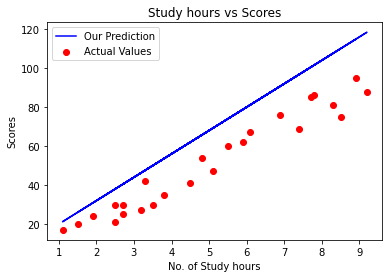

In [58]:
# Lets now try different values for 'w' and 'b' , till we make the line/model fits the data.
y_hat= model_predictions(x, w=12, b=8)
plot_data()

* After keep trying out different values for w and b we could fit the line as the following: 

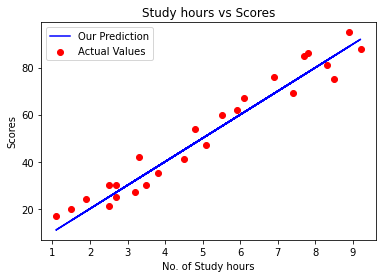

In [59]:
y_hat= model_predictions(x, w=10, b=0)
plot_data()

* We can see that the above model with w = 10 and b=0 is making our model to fit our data beter than other models we saw before.
* There may be different values for w,b can fit the model. ( you can try them out ;) ).

#### Remarks:
*  The linear regression model assumes a linear relationship between the independent variable($x$) and the dependent variable ($y$), and it seeks to find the best-fitting line that represents this relationship.
* The straight line equation: $y = wx + b$ is the mathematical representation of the linear regression model,where:
    *  y is the dependent variable (the variable we are trying to predict).
    * x is the independent variable (the variable we use to make predictions).
    * w and b are the parameters that need to be estimated based on the given data. 
        * w is the slope (the coefficient that represents the rate of change of $y$ with respect to $x$ ).
        * b is  y-intercept (the value of $y$ when $x$ is zero), some times is called the bias.



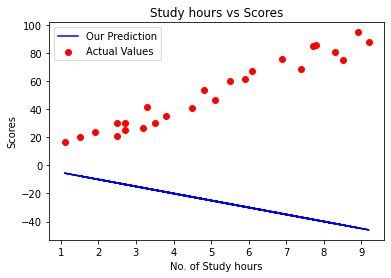

In [60]:
# To have some intuiton we can select  different values for w (i.e: w=-5(negative slope) and b = 0 
y_hat= model_predictions(x, w = -5, b=0)
plot_data()

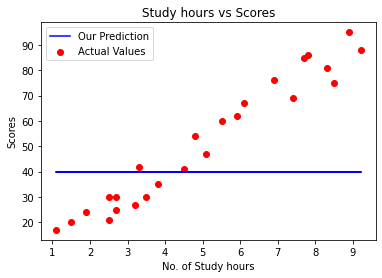

In [61]:
# What if we set w to 0 (w=0) and change b to different values ( try different bias b=0, 40, -10)!
y_hat= model_predictions(x, w = 0, b=40)
plot_data()

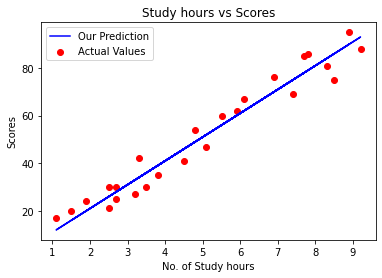

In [62]:
# Lets find  optimized values parameters for w,b(i.e: w=10 and b=1)
y_hat= model_predictions(x, w=10, b=1)
plot_data()

####  Using the model :)

* Now our model is a good fit and ready to use it to predict scores for new students who studied for $x$ number of hours ( Even those students are not included in the dataset).

In [63]:
# If a student studied for 4 hours? what score he will get?!! Let's predict that using our  model :)
w = 10                         # our optimized value for w param.
b= 1                           # our optimized value for b param.
study_hours = 4                # Number of study hours that the student studied ( x input).
score =  w * study_hours + b   # Predicted score
print(f'The predicted score for a student who studied 4 hours is {score} :)')

The predicted score for a student who studied 4 hours is 41 :)


In [64]:
# Lets write the code above in a function and predict for as many students as we want :)
def predict_score(study_hours, w = 10, b = 1):
    score =  w * study_hours + b
    print(f'The predicted score for a student who studied for {study_hours} hours is {score} :)')
    

In [65]:
# Lets predict scores as many as we want :)
predict_score(4)

The predicted score for a student who studied for 4 hours is 41 :)


In [66]:
predict_score(9)

The predicted score for a student who studied for 9 hours is 91 :)


In [67]:
predict_score(1)

The predicted score for a student who studied for 1 hours is 11 :)


In [68]:
# What if student studied 10 hours ?
predict_score(10)

The predicted score for a student who studied for 10 hours is 101 :)


* Here our model is keeping predicting linearly, but when the maximum score is 100 and minimum is zero, we can modify our function to return max or min score when the predicted value is over 100 or less than zero respectively.

In [69]:
def predict_score(study_hours, w = 10, b = 1):
    score =  w * study_hours + b
    if score <=0:
        score = 0
    elif score >= 100:
        score = 100
    print(f'The predicted score for a student who studied for {study_hours} hours is {score} :)')
    

In [70]:
predict_score(10)

The predicted score for a student who studied for 10 hours is 100 :)


In [71]:
predict_score(0)

The predicted score for a student who studied for 0 hours is 1 :)


In [72]:
# We know that study of hours can not be minus, but in case the user input negative value!
predict_score(-4)

The predicted score for a student who studied for -4 hours is 0 :)


### Evaluation metrics:  how our model good is? 

* To know how our model is good we need to measure the error between actual values $y$ and predicted values $\hat{y}$ ( regression line). In our example here we can measure the difference between predicted scores and actual scores for students whose scores are already known.
* Geometrically is a shown below: ![image error](regression_loss_error.png)
 * Numerically, there are some metrics used to calculate the error for regression problems, one of the most used is the Mean Absolute Error (MAE):
     * MAE measures the average absolute difference between predicted and actual values. It is less sensitive to outliers compared to MSE $$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$


In [73]:
# Lets build a function to calcualte MAE error for our model above.
def MAE(y, y_hat):
    n = len(y)
    mae = np.abs(y - y_hat)
    mae  = sum(mae)/ n
    return mae
    

In [74]:
# Shorter version of our MAE fuction can be:
def MAE(y, y_hat):
    return np.mean(np.abs(y - y_hat))


In [75]:
# Lets predict scores and recieve the predictions to y_hat
y_hat= model_predictions(x, w=10, b=0)
y_hat

array([25., 51., 32., 85., 35., 15., 92., 55., 83., 27., 77., 59., 45.,
       33., 11., 89., 25., 19., 61., 74., 27., 48., 38., 69., 78.])

In [76]:
# We already have  the actual values y:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [77]:
# Lets compare predictons y_hat with actual values y, using our MAE meteric function
MAE(y, y_hat)

5.2

* As we can see above, our model has an average MAE error of 5.2. This seems acceptable for predicting a student's score on a scale of 1 to 100. :)

## How to Select w,b automatically? 


* We mentioned earlier that trying  values for w and b parameters manually is not practical solution. The practical way is to have an algorithm to help the computer  to select the best values for w and b that fits the training data very well. To acheive that we should solve the following:
    * Start with a random guess for w and b parameters.( initial values)
    * find a way to measure numerically how well the line/model fits the data points.( find a loss/ cost function  to mesure the error).
    * find a way to modify w and b values automatically to optimize and minimize the loss/erro till the line fits the data. ( find an Optimization algorithm to minimize the error).

### [Loss/ Cost function](https://www.youtube.com/watch?v=CFN5zHzEuGY&list=PLkDaE6sCZn6FNC6YRfRQc_FbeQrF8BwGI&index=11):
* Several loss functions are commonly used in regression problems in machine learning. Those functios work as a measure to calculate numerically the error between the actual target values $y$  and the predicted values $\hat{y}$. Some of the most famous loss functions for regression problems in machine learning are: 
    1. Mean Absolute Error (MAE) / L1 Loss: 
        MAE measures the average absolute difference between predicted and actual values. It is less sensitive to outliers compared to MSE.
        $$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|\tag{3}$$ 
        
        Where $n$ is the number of examples(rows).( Here in our example $n$ is the number of students $n=25$ )

    2. Mean Squared Error (MSE) / L2 Loss: 
        This is perhaps the most widely used loss function for regression. It measures the average squared difference between predicted and actual values.
         $$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2\tag{4}$$
    3. Root Mean Squared Error (RMSE):
          RMSE (Root Mean Squared Error) is another commonly used loss function for regression problems. While it is often used as an evaluation metric, it can also be employed as a loss function during the training of a machine learning model. The RMSE is defined as:  $$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}\tag{5}$$
 
    

### Optimization algorithms:
* Several optimization methods are commonly used for training regression models in machine learning. These optimization methods aim to adjust the model parameters(i.e. w,b) to minimize a chosen loss function. Here are some commonly used optimization methods:
1. [Ordinary Least Squares (OLS)](https://en.wikipedia.org/wiki/Ordinary_least_squares): 
    It is a technique for estimating the parameters (coefficients) of a linear regression model by minimizing the sum of the squared differences between the observed and predicted values. (OLS is widely used when the dataset is small and some assumptions of linear regression are met).
2. [Gradient Descent](https://www.youtube.com/watch?v=WtlvKq_zxPI&list=PLkDaE6sCZn6FNC6YRfRQc_FbeQrF8BwGI&index=15): Gradient Descent is an optimization algorithm commonly used in machine learning for minimizing the cost or loss function during the training of a model. The goal of the algorithm is to iteratively adjust the parameters of a model in the direction that reduces the cost function.

#### Remark:
* In real-world scenarios, we often don't need to write every piece of code from scratch, as we're currently doing. Instead, we can leverage machine learning packages like Scikit-learn (SKlearn) (we will use that later in this notebook). These packages offer a streamlined way to develop models, allowing us to effortlessly implement metrics, cost functions, and optimization algorithms in just a few lines of code. However, it is highly recommended to begin with simple examples built from the ground up. This approach provides a solid understanding of the fundamental processes occurring under the hood, laying a strong foundation for more advanced utilization of ML packages.